In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!unzip "/content/drive/MyDrive/Alzheimer /archive.zip"

unzip:  cannot find or open /content/drive/MyDrive/Alzheimer /archive.zip, /content/drive/MyDrive/Alzheimer /archive.zip.zip or /content/drive/MyDrive/Alzheimer /archive.zip.ZIP.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import random
path = '/content/Dataset'
data_dir = pathlib.Path(path)

In [ ]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([], shape=(1, 0), dtype=float64)

In [ ]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

0

In [ ]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))

    img = plt.imread(path)

    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

In [ ]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))

plot(str(Mild_Demented),"Mild_Demented")

IndexError: ignored

/content/Dataset/Moderate_Demented/moderate_63.jpg


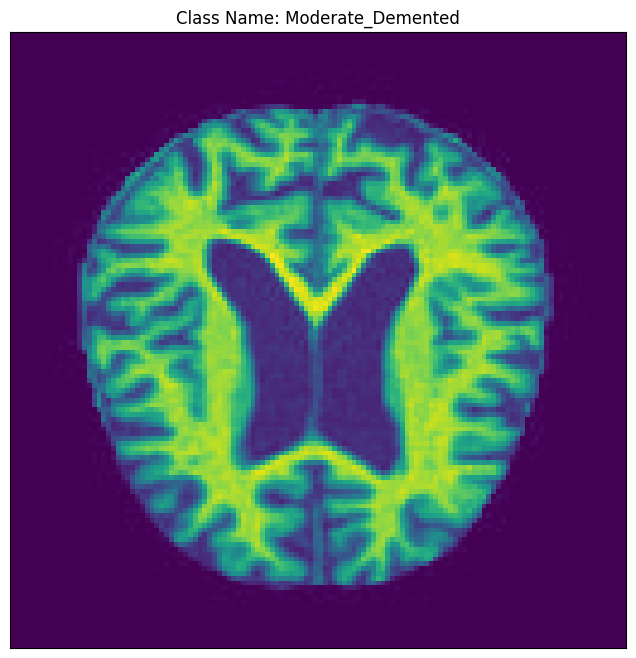

In [ ]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))

plot(str(Moderate_Demented),"Moderate_Demented")

/content/Dataset/Non_Demented/non_2469.jpg


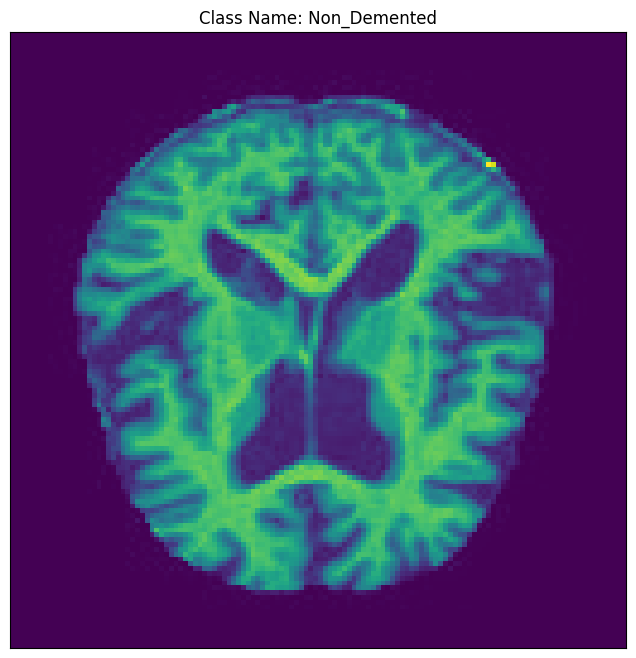

In [ ]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

/content/Dataset/Very_Mild_Demented/verymild_1991.jpg


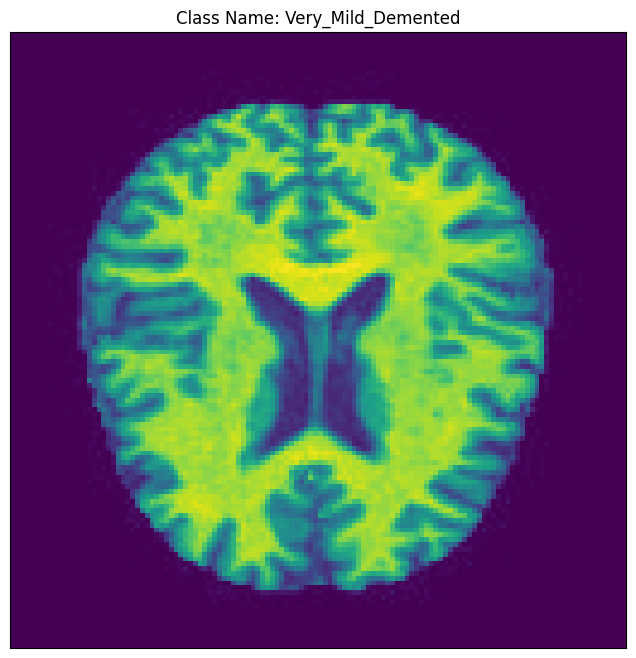

In [ ]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([

   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),

  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [ ]:
epochs = 20
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/20
160/160 [==============================] - 9s 53ms/step - loss: 0.2459 - accuracy: 0.9049 - val_loss: 0.1643 - val_accuracy: 0.9461
Epoch 2/20
160/160 [==============================] - 8s 47ms/step - loss: 0.1951 - accuracy: 0.9270 - val_loss: 0.1608 - val_accuracy: 0.9430
Epoch 3/20
160/160 [==============================] - 9s 55ms/step - loss: 0.1382 - accuracy: 0.9457 - val_loss: 0.1216 - val_accuracy: 0.9586
Epoch 4/20
160/160 [==============================] - 10s 64ms/step - loss: 0.1190 - accuracy: 0.9582 - val_loss: 0.0996 - val_accuracy: 0.9641
Epoch 5/20
160/160 [==============================] - 9s 52ms/step - loss: 0.0844 - accuracy: 0.9686 - val_loss: 0.0525 - val_accuracy: 0.9836
Epoch 6/20
160/160 [==============================] - 9s 54ms/step - loss: 0.0697 - accuracy: 0.9729 - val_loss: 0.0598 - val_accuracy: 0.9820
Epoch 7/20
160/160 [==============================] - 8s 47ms/step - loss: 0.0706 - accuracy: 0.9766 - val_loss: 0.0562 - val_accuracy: 0.981

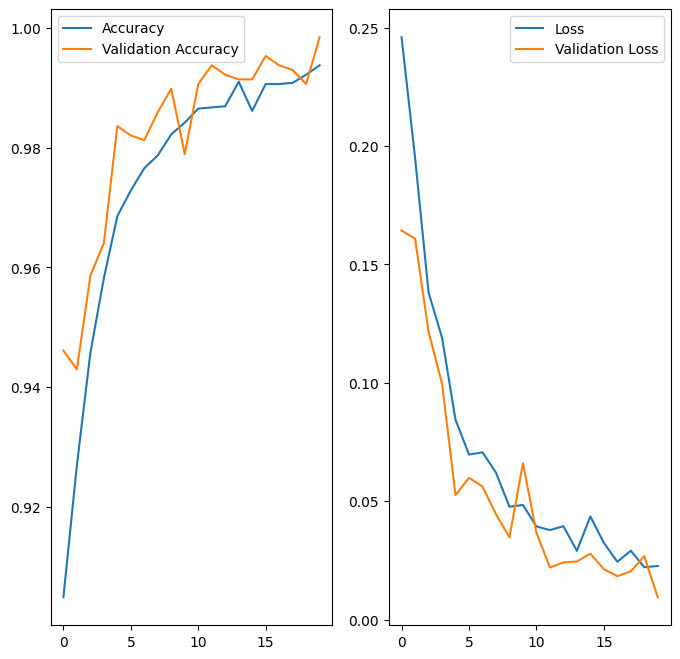

In [ ]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


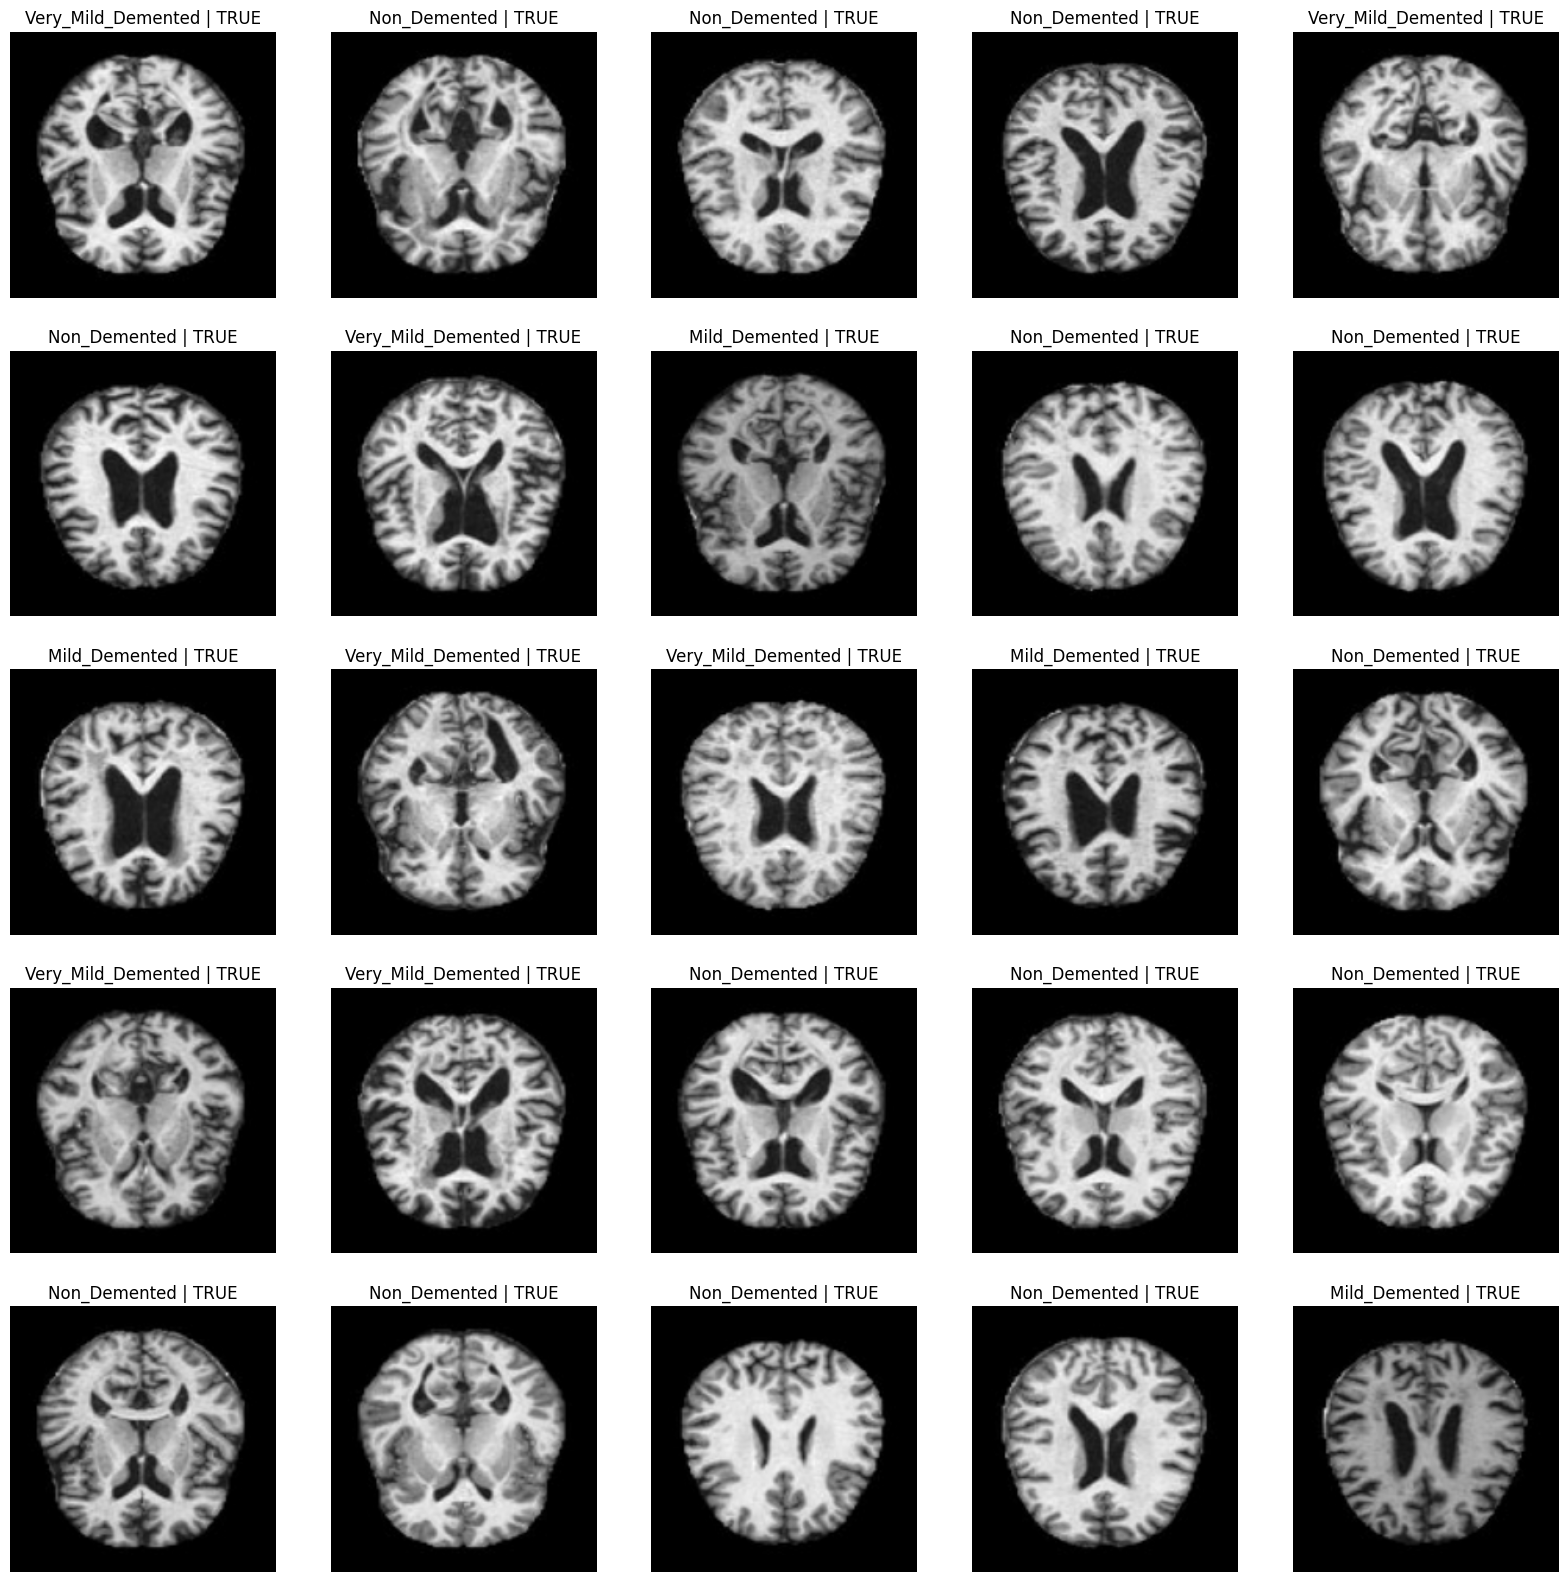

In [ ]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):

        ax = plt.subplot(5, 5, i + 1)

        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)

        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

In [ ]:
model.save("my_model")

#APPLICATION

In [14]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [15]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
import os
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory
f1=folder_path = "input"
folder_path = "input/test"
os.makedirs(folder_path, exist_ok=True)
# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/Alzheimer/my_model")
img_height = 224
img_width = 224
batch_size = 32
# Define the class names
class_names = ['Mild_Demented','Moderate_Demented','Non_Demented','Very_Mild_Demented']

# Create a file uploader widget
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

# Perform prediction when the user clicks the 'Predict' button
if uploaded_file is not None:
    with open(os.path.join(folder_path,"input.jpg"), 'wb') as f:
        f.write(uploaded_file.getvalue())
    val_data = image_dataset_from_directory(f1,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)


    for images, labels in val_data.take(1):
        for i in range(1):



            img = images[i].numpy().astype("uint8")
            img = tf.expand_dims(img, axis=0)

            predictions = model.predict(img)
            predicted_class = np.argmax(predictions)



    # Display the uploaded image and the predicted class
    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    st.write("Predicted class:", predicted_class)
    if predicted_class == 0:
        st.write("mild")
    elif predicted_class == 1:
        st.write("moderate")
    elif predicted_class == 2:
        st.write("non")
    elif predicted_class == 3:
        st.write("very_mild")
    else:
        st.write("Invalid class")


Writing app.py


In [16]:
!curl ipv4.icanhazip.com

35.197.59.138


In [ ]:
!npm install localtunnel
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.641s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details
npx: installed 22 in 1.682s
your url is: https://clear-gifts-burn.loca.lt
